This notebook shows you how to visualize the generator profiles provided by the NY Simple Net.

In [4]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cmaqpy.prepemis as emis

In [5]:
in_emis_file = '/home/jas983/models/ertac_egu/CONUS2016_S0/outputs/calc_hourly_base.csv'
co2_file = '../cmaqpy/data/ny_emis/ml_output/pred_xg_co2_fix.csv'
# co2_base_file = ''
nox_file = '../cmaqpy/data/ny_emis/ml_output/pred_xg_nox_fix.csv'
# nox_base_file = ''
so2_file = '../cmaqpy/data/ny_emis/ml_output/pred_xg_so2_fix.csv'
# so2_base_file = ''
gen_file = '../cmaqpy/data/ny_emis/ed_output/thermal_with_renewable_20160805_20160815.csv'
gen_base_file = '../cmaqpy/data/ny_emis/ed_output/thermal_without_renewable_20160805_20160815.csv'
lu_file = '../cmaqpy/data/ny_emis/ed_output/RGGI_to_NYISO.csv'

# Read in the base emissions file
base_df = emis.fmt_calc_hourly_base(base_file=in_emis_file)
# Read in ML CO2 emissions estimations
ml_co2 = emis.fmt_like_camd(data_file=co2_file, lu_file=lu_file)
# Read in ML NOx emissions estimations
ml_nox = emis.fmt_like_camd(data_file=nox_file, lu_file=lu_file)
# Read in ML SO2 emissions estimations
ml_so2 = emis.fmt_like_camd(data_file=so2_file, lu_file=lu_file)
# Read in NY Simple Net generation
ed_gen = emis.fmt_like_camd(data_file=gen_file, lu_file=lu_file)
ed_gen_base = emis.fmt_like_camd(data_file=gen_base_file, lu_file=lu_file)

In [77]:
ed_gen

RGGI Facility Name ORISPL Unit ID        NYISO Name   PTID  \
0                 23rd & 3rd    7910    2301         Gowanus 5  24156   
1                 23rd & 3rd    7910    2302         Gowanus 6  24157   
2    Allegany Station No. 133  10619       1          Allegany  23514   
3                 Arthur Kill   2490      20  Arthur Kill ST 2  23512   
4                 Arthur Kill   2490      30  Arthur Kill ST 3  23513   
..                        ...    ...     ...               ...    ...   
216          Vernon Boulevard   7909    VB02     Vernon Blvd 3  24163   
217     Wading River Facility   7146  UGT007    Wading River 1  23522   
218     Wading River Facility   7146  UGT008    Wading River 2  23547   
219     Wading River Facility   7146  UGT009    Wading River 3  23601   
220     West Babylon Facility   2521  UGT001    West Babylon 4  23714   

    2016-08-05 00:00:00 2016-08-05 01:00:00 2016-08-05 02:00:00  \
0                  19.0                19.0                19.0   
1                   6.0                 6.0                 6.0   
2                  11.0                11.0                11.0   
3                  96.0                96.0                96.0   
4                   1.0                 1.0                 1.0   
..                  ...                 ...                 ...   
216                15.0                15.0                15.0   
217                 9.0                 9.0                 9.0   
218                 7.8                 7.8                 7.8   
219                 4.0                 4.0                 4.0   
220                 3.0                 3.0                 3.0   

    2016-08-05 03:00:00 2016-08-05 04:00:00  ... 2016-08-15 14:00:00  \
0                  19.0                19.0  ...                44.0   
1                   6.0                 6.0  ...                43.0   
2                  11.0                11.0  ...                66.0   
3                  96.0                96.0  ...               349.0   
4                   1.0                 1.0  ...               539.0   
..                  ...                 ...  ...                 ...   
216                15.0                15.0  ...                42.0   
217                 9.0                 9.0  ...                 9.0   
218                 7.8                 7.8  ...                 7.8   
219                 4.0                 4.0  ...                 4.0   
220                 3.0                 3.0  ...                 3.0   

    2016-08-15 15:00:00 2016-08-15 16:00:00 2016-08-15 17:00:00  \
0                  19.0                19.0                19.0   
1                  43.0                 6.0                 6.0   
2                  66.0                66.0                66.0   
3                 349.0               349.0               349.0   
4                 539.0               539.0               539.0   
..                  ...                 ...                 ...   
216                15.0                15.0                15.0   
217                 9.0                 9.0                 9.0   
218                 7.8                 7.8                 7.8   
219                 4.0                 4.0                 4.0   
220                 3.0                 3.0                 3.0   

    2016-08-15 18:00:00 2016-08-15 19:00:00 2016-08-15 20:00:00  \
0                  19.0                19.0                19.0   
1                   6.0                 6.0                 6.0   
2                  66.0                66.0                66.0   
3                 349.0               349.0               349.0   
4                 539.0               539.0               539.0   
..                  ...                 ...                 ...   
216                15.0                15.0                15.0   
217                 9.0                 9.0                 9.0   
218                 7.8                 7.8             

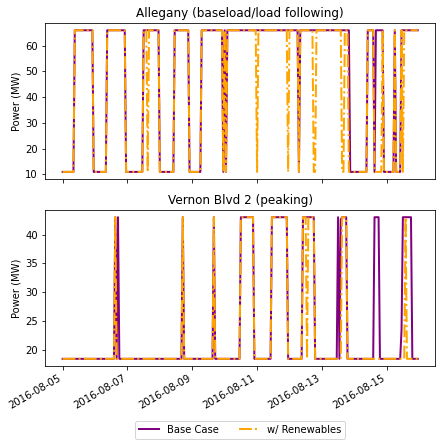

In [119]:
gen_idx1 = 2
gen_idx2 = 215

dis_change1 = pd.concat([ed_gen_base.iloc[gen_idx1,5:], ed_gen.iloc[gen_idx1,5:]], axis=1)
dis_change1.columns = ['Base Case', 'w/ Renewables']
dis_change2 = pd.concat([ed_gen_base.iloc[gen_idx2,5:], ed_gen.iloc[gen_idx2,5:]], axis=1)
dis_change2.columns = ['Base Case', 'w/ Renewables']
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7,7))
# f = plt.figure(figsize=(7,3))
p1 = dis_change1.plot(color=['purple','orange'], linewidth=2, style=['-','-.'], ax=ax1)
p2 = dis_change2.plot(color=['purple','orange'], linewidth=2, style=['-','-.'], ax=ax2)
ax1.get_legend().remove()
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=2)
ax1.set_title(f'{ed_gen["NYISO Name"][gen_idx1]} (baseload/load following)')
ax2.set_title(f'{ed_gen["NYISO Name"][gen_idx2]} (peaking)')
ax1.set_ylabel('Power (MW)')
ax2.set_ylabel('Power (MW)')
plt.savefig(f'../cmaqpy/data/plots/gen_profs_{ed_gen["NYISO Name"][gen_idx1]}_{ed_gen["NYISO Name"][gen_idx2]}.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

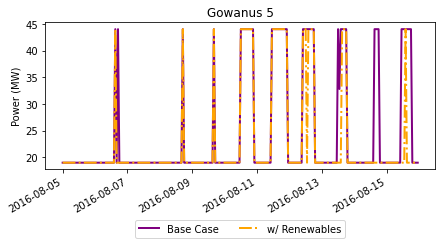

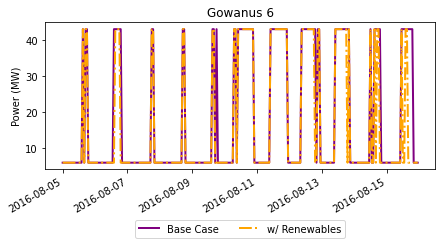

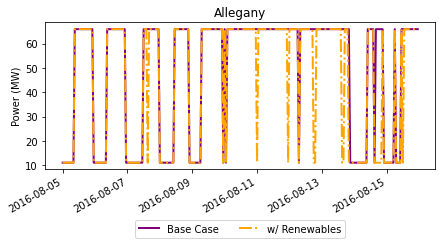

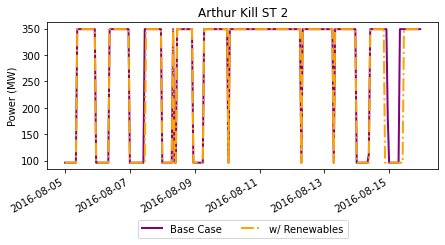

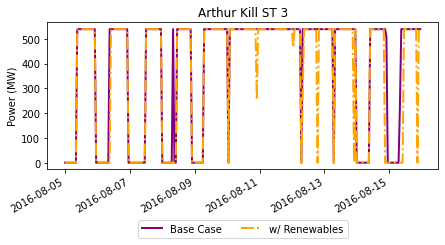

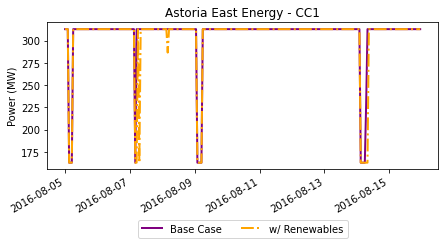

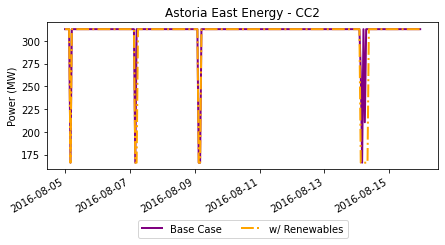

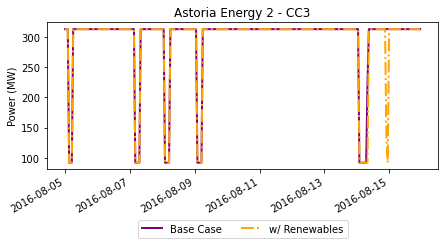

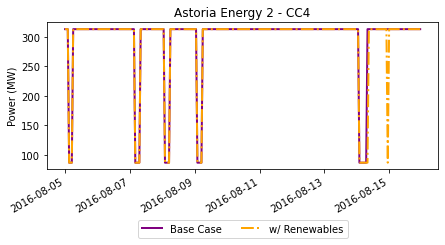

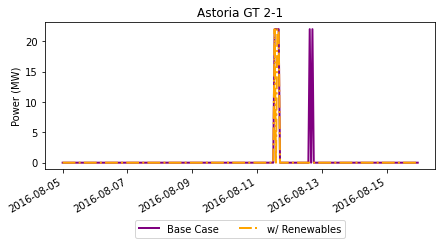

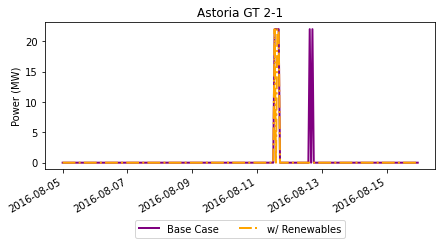

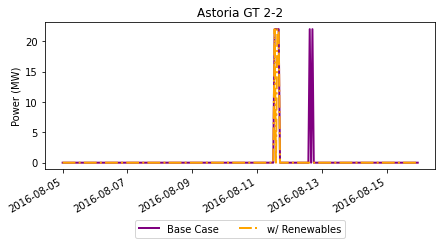

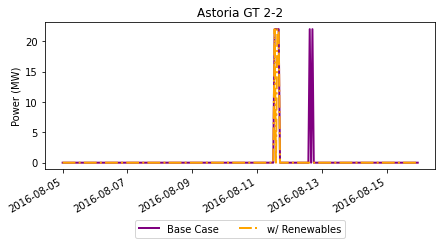

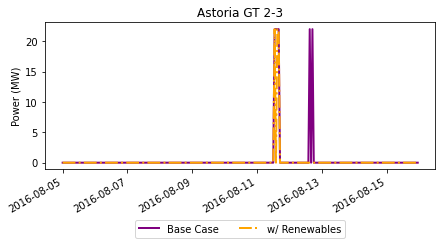

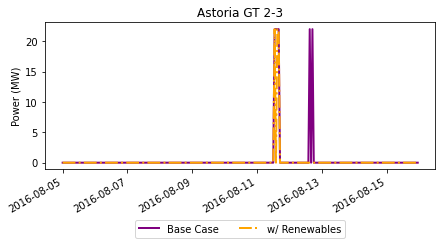

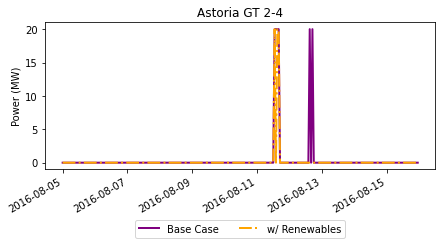

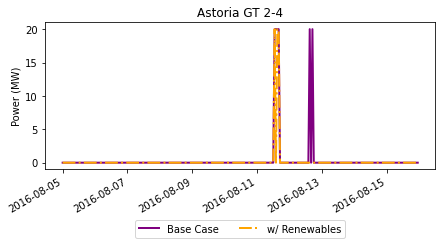

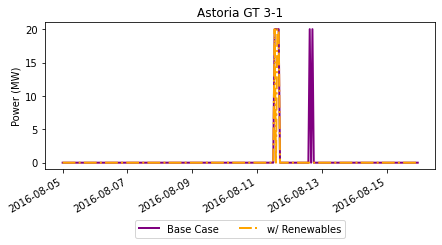

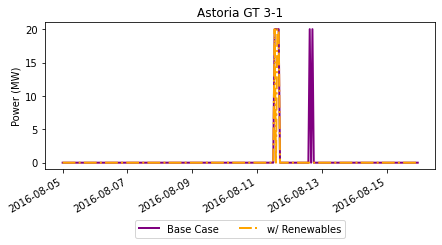

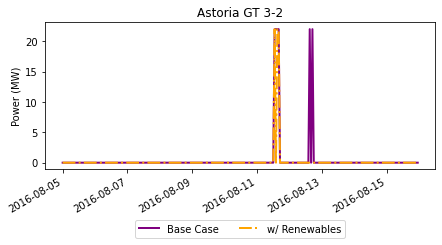

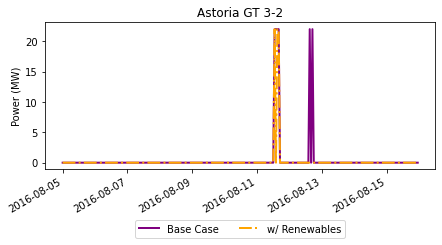

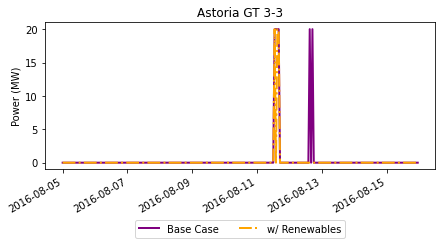

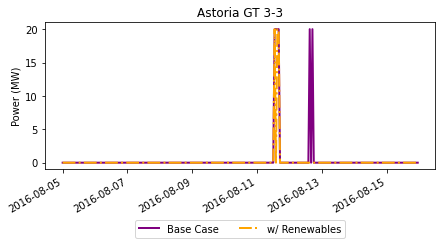

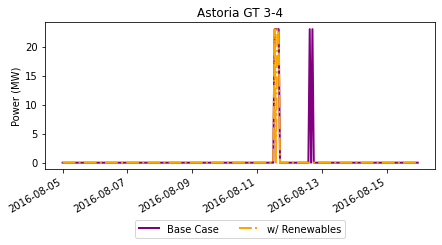

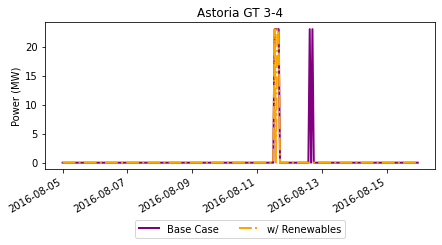

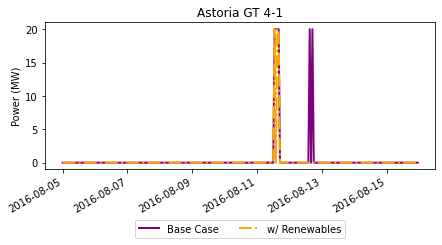

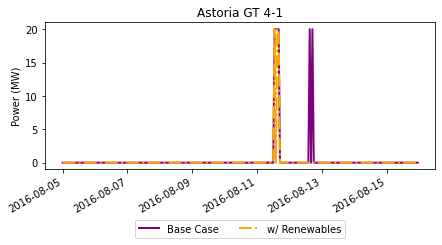

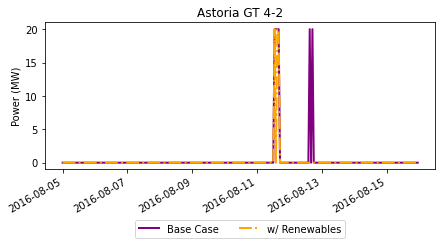

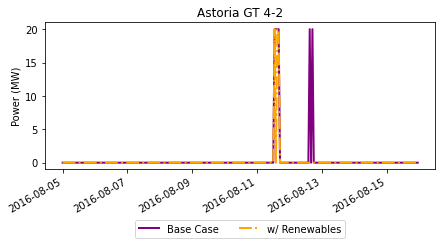

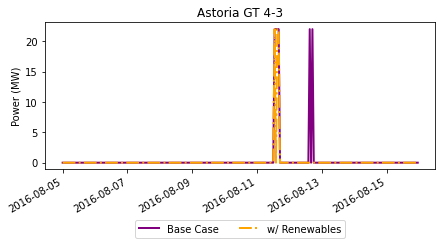

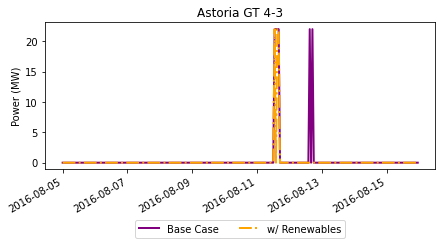

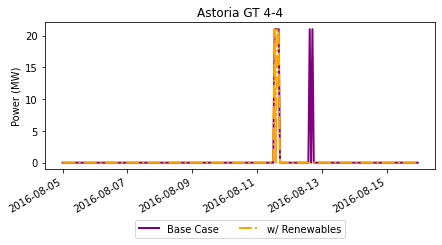

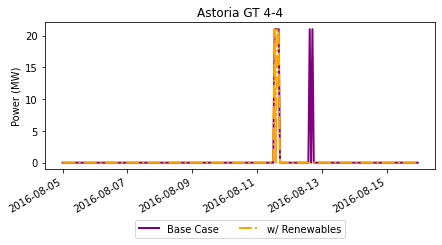

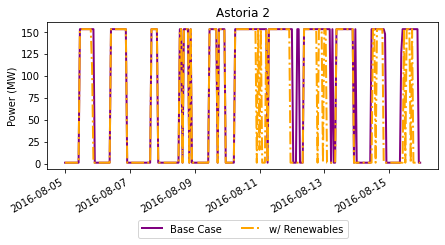

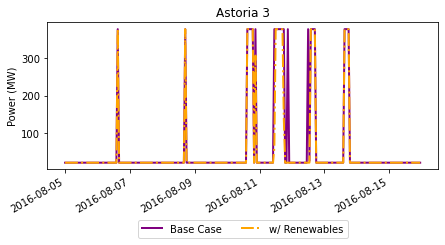

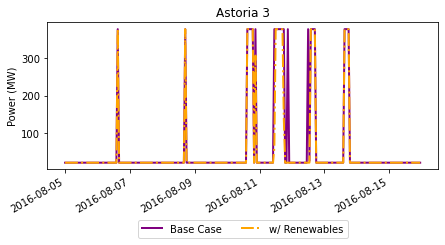

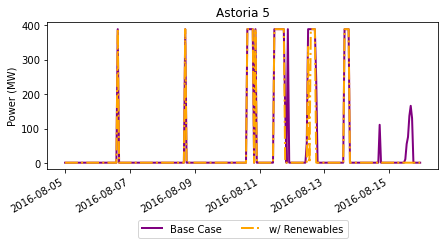

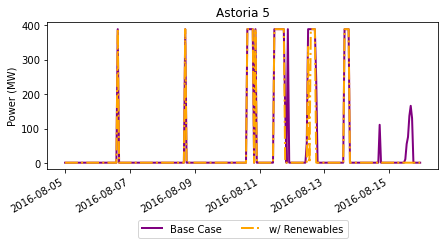

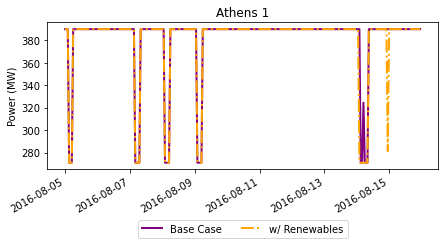

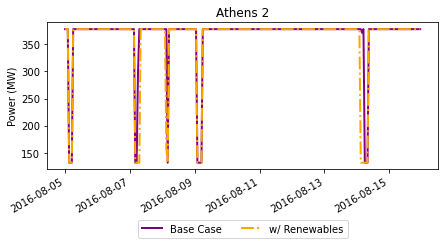

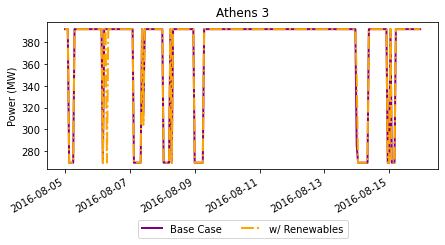

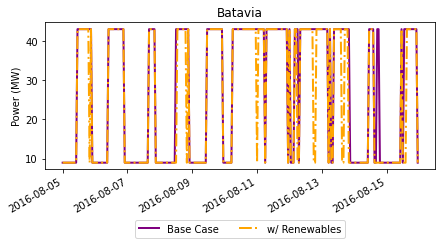

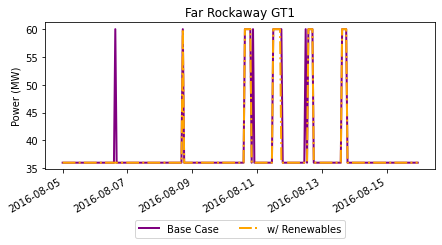

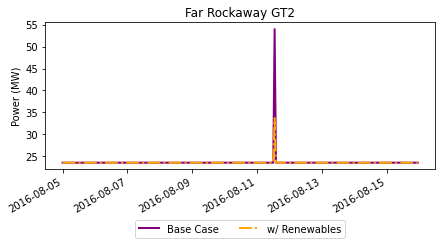

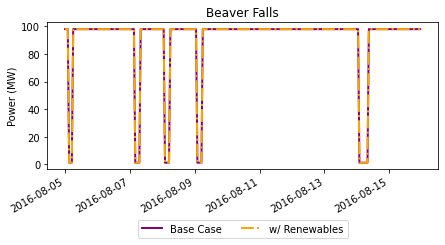

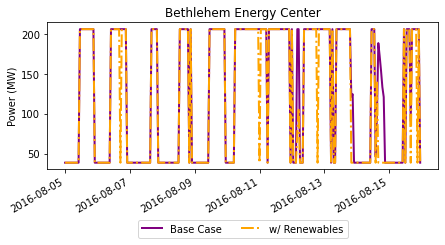

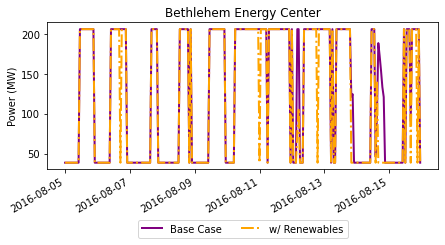

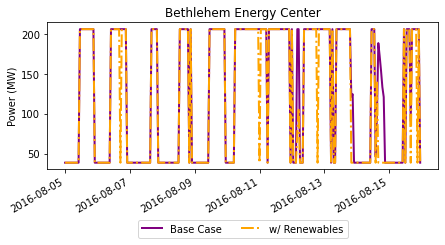

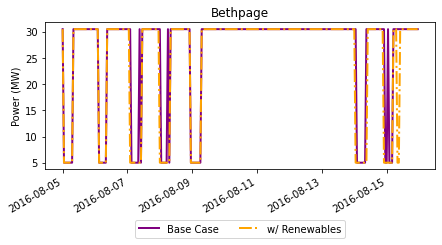

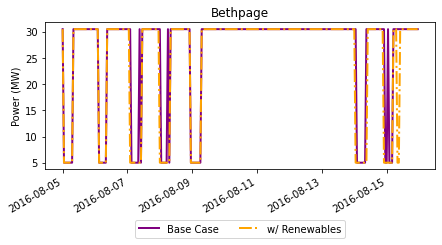

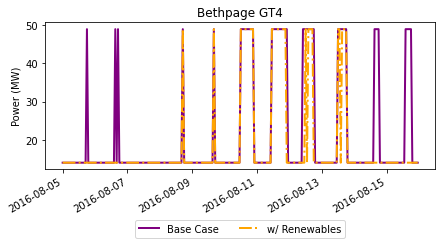

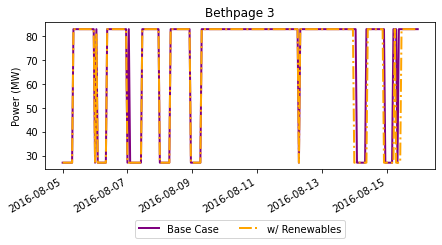

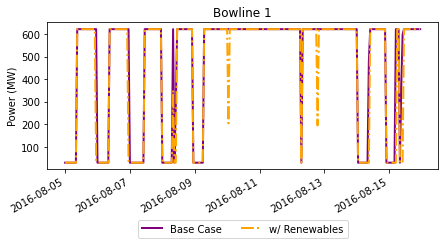

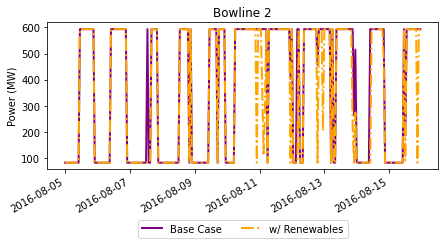

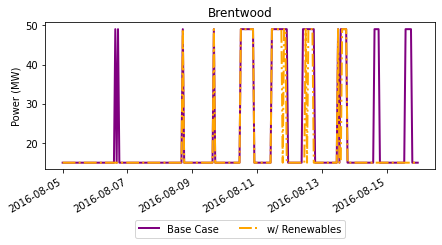

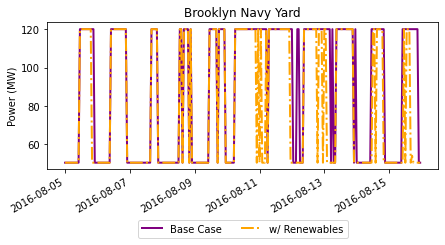

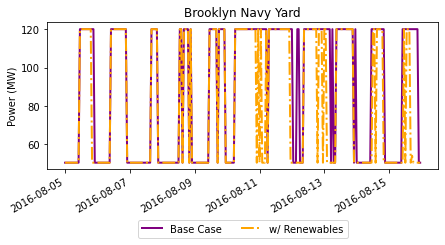

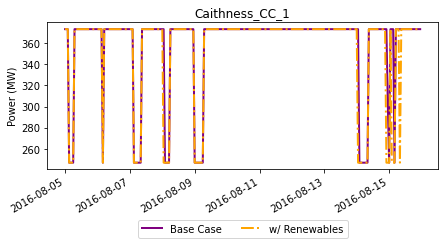

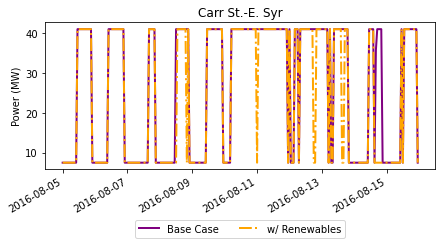

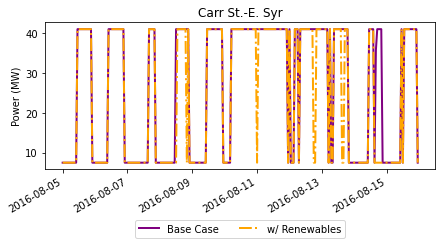

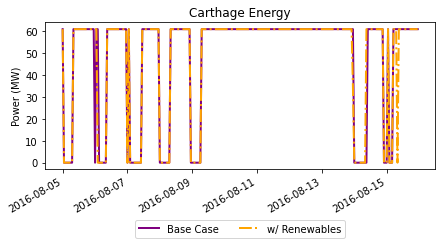

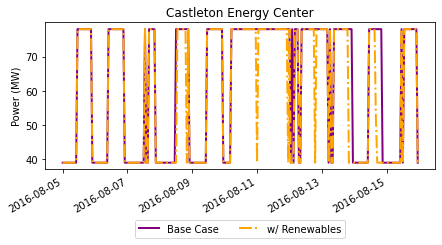

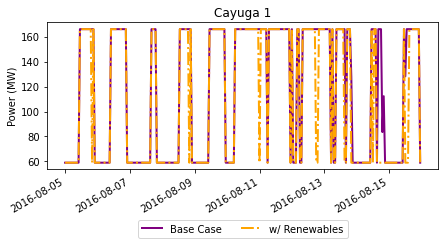

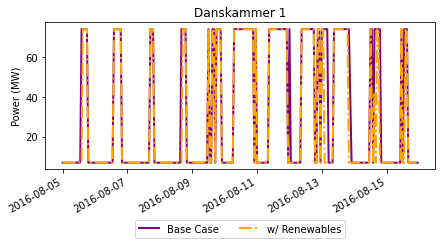

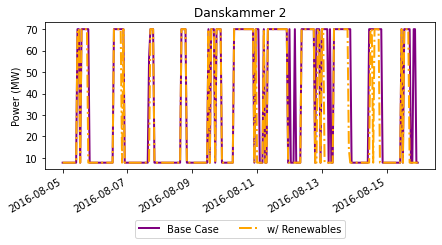

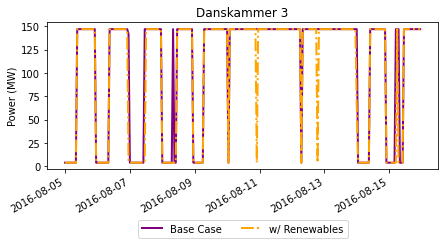

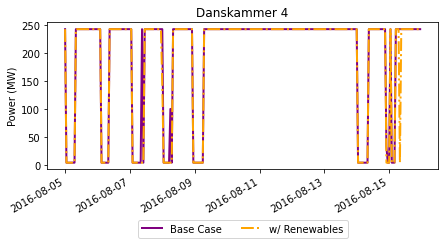

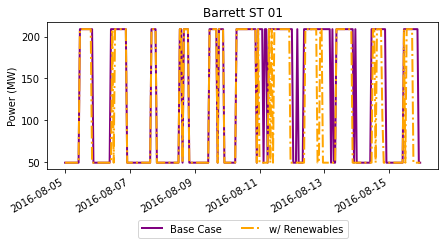

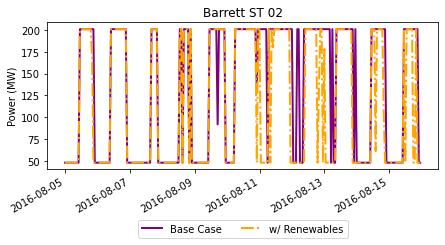

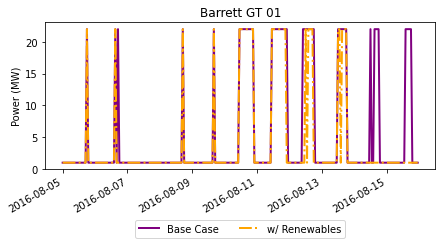

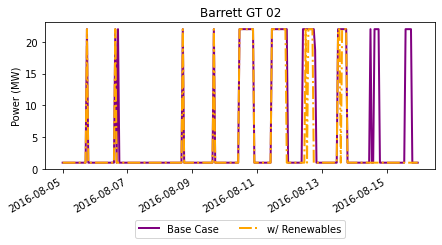

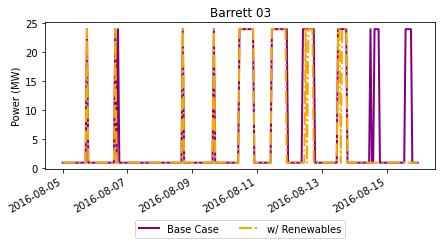

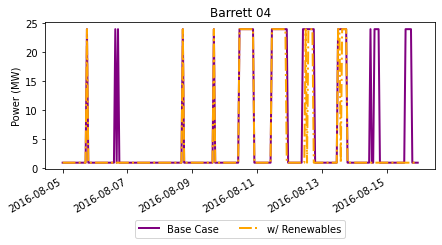

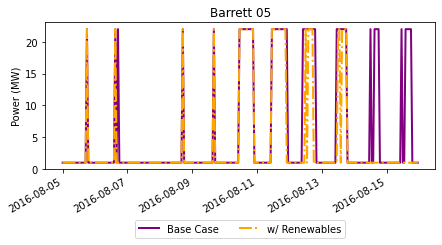

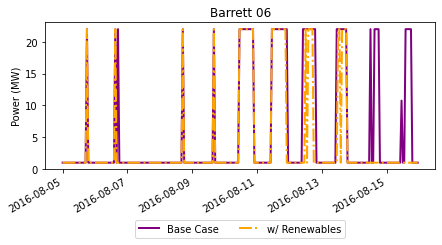

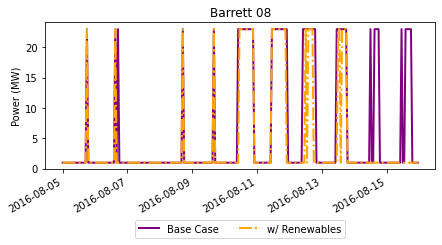

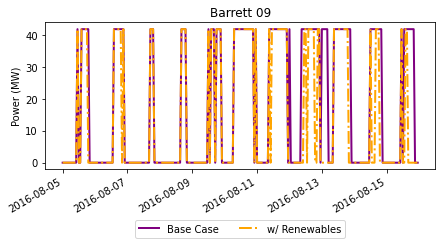

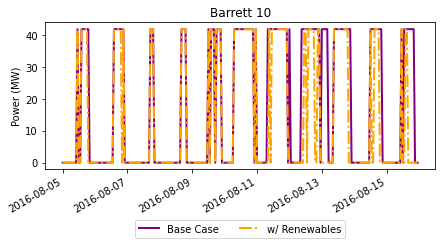

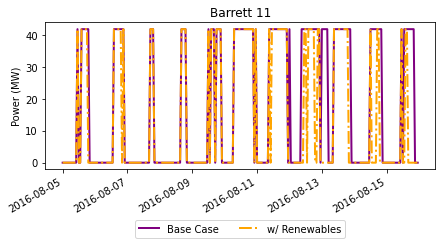

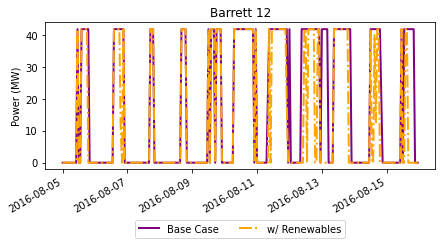

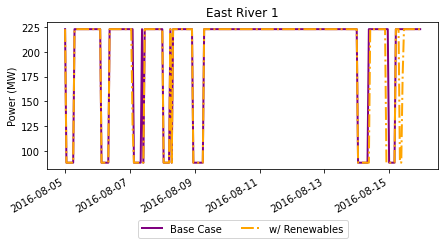

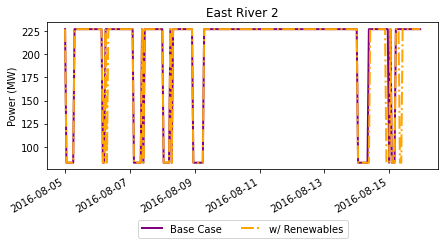

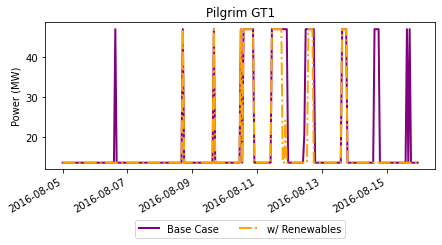

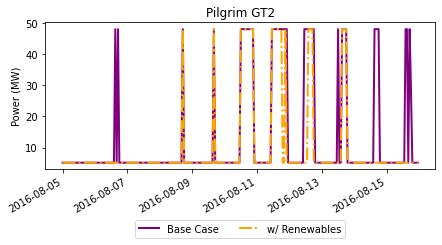

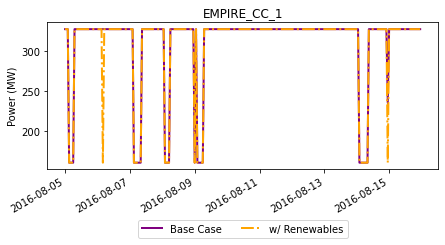

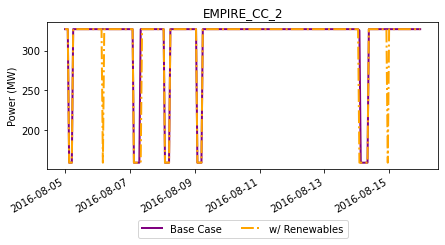

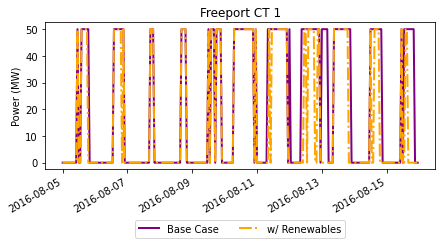

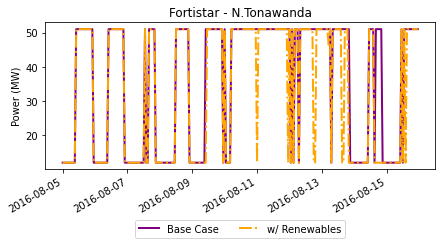

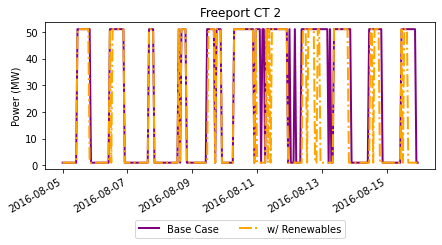

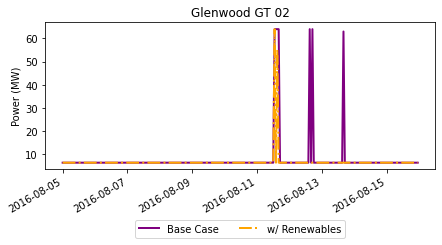

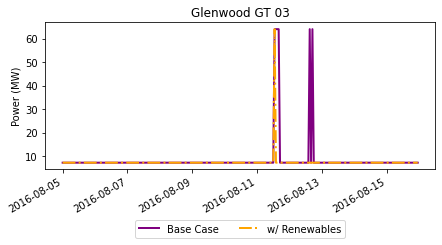

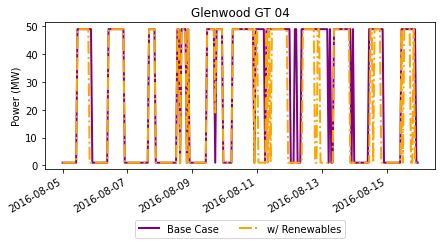

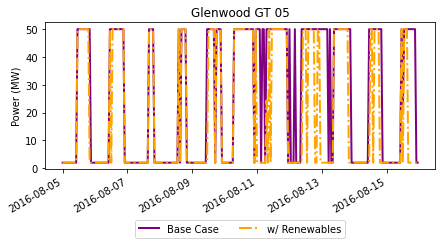

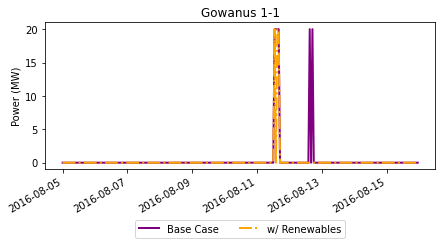

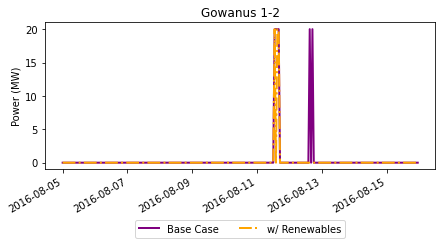

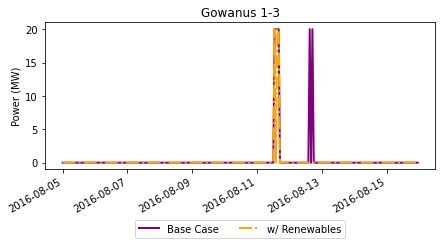

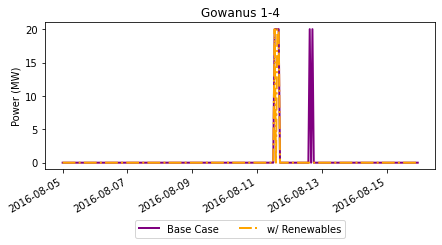

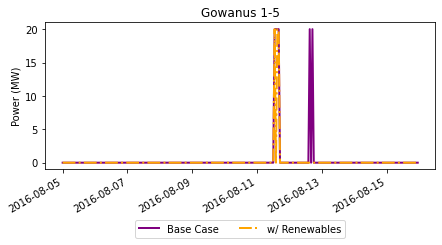

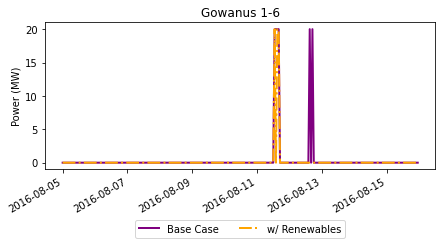

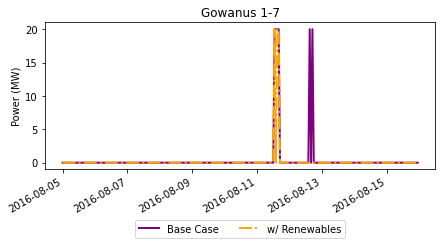

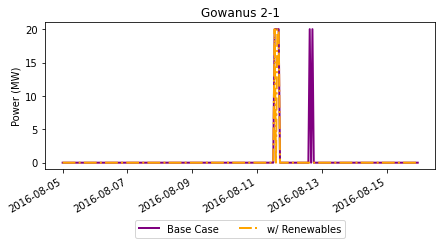

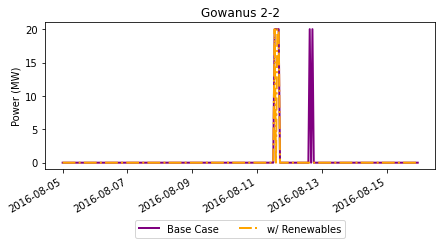

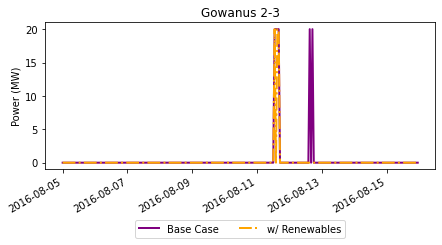

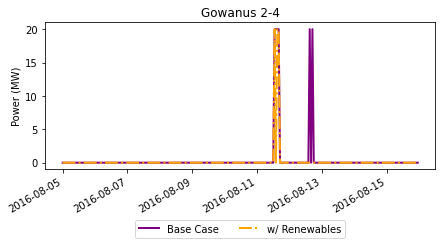

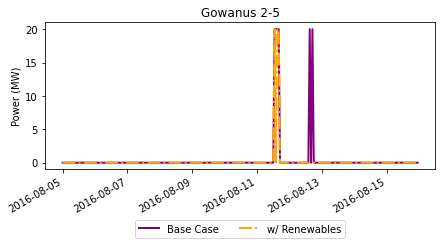

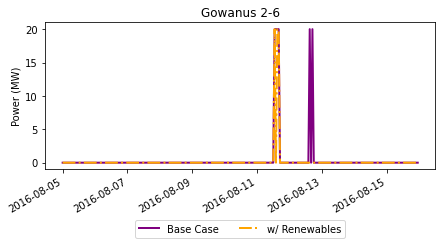

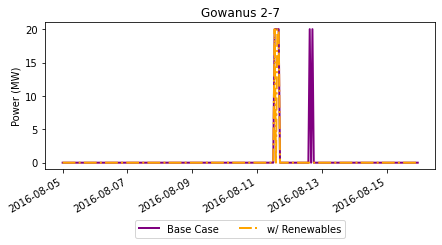

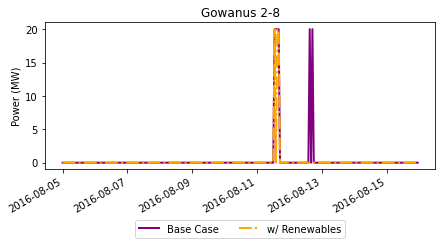

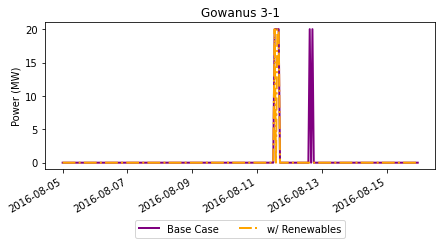

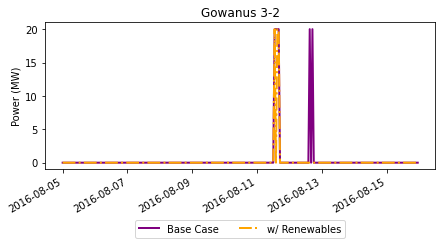

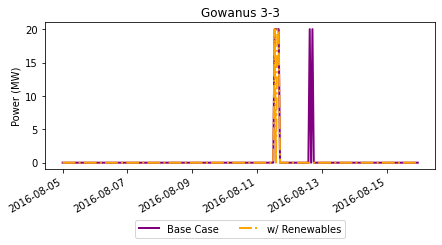

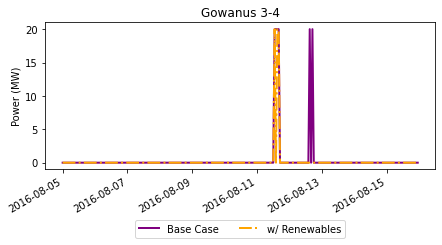

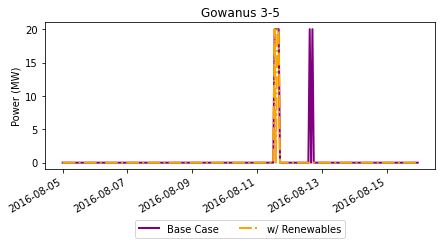

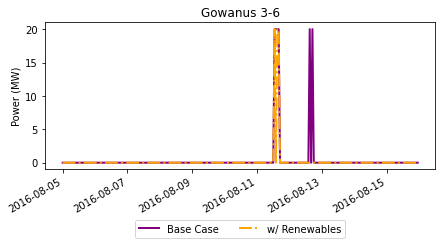

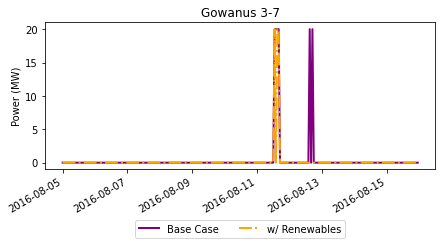

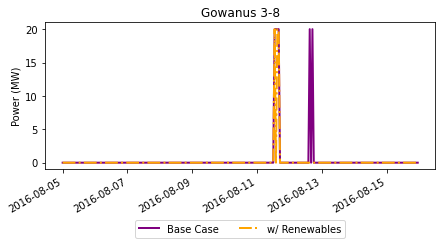

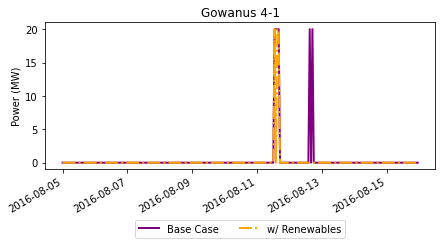

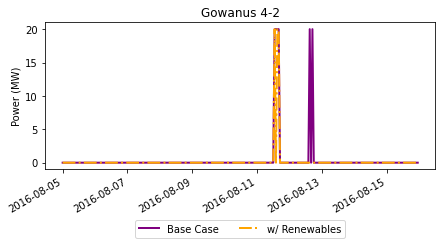

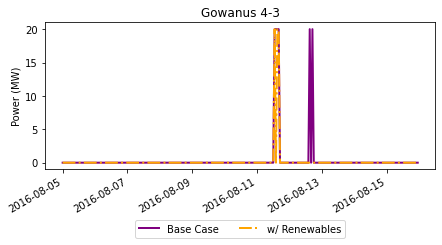

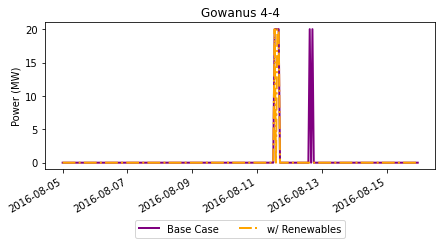

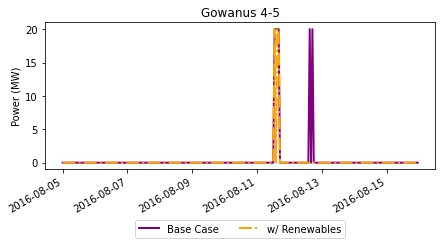

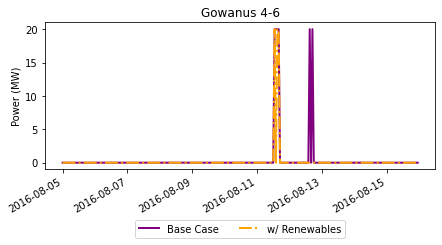

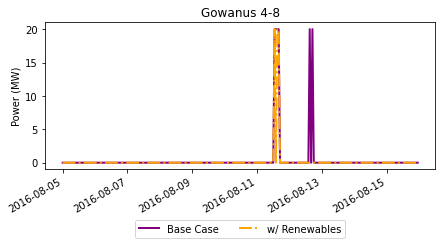

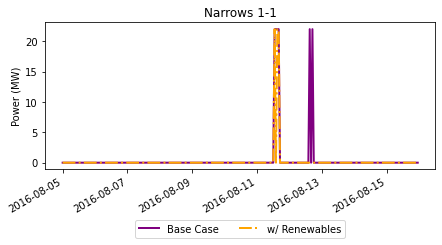

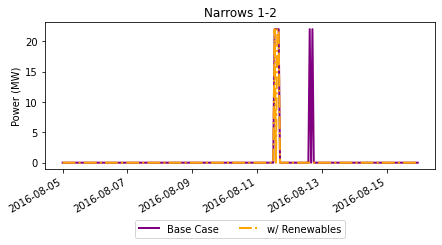

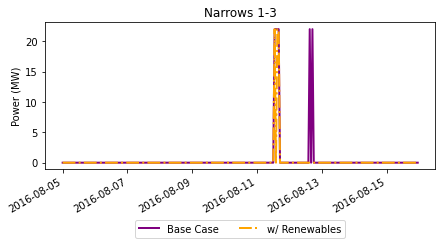

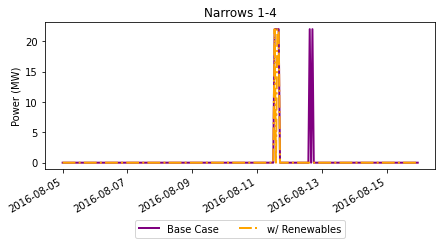

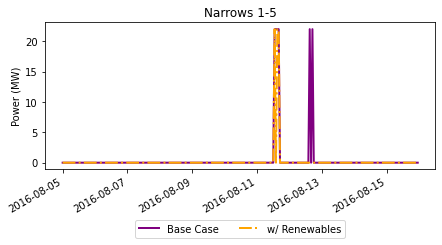

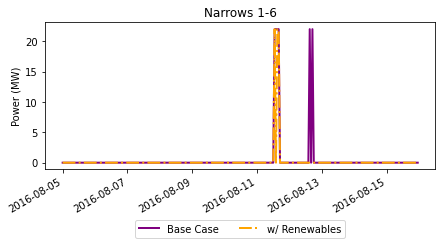

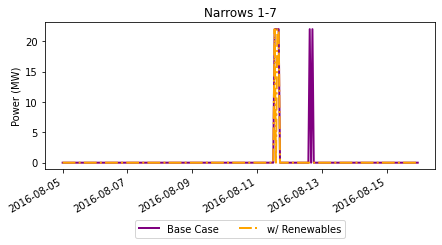

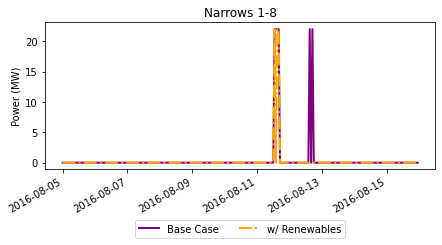

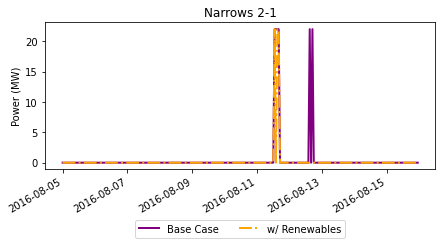

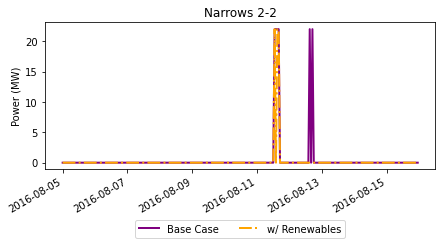

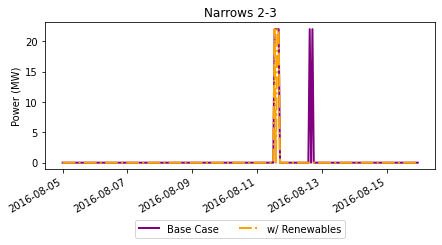

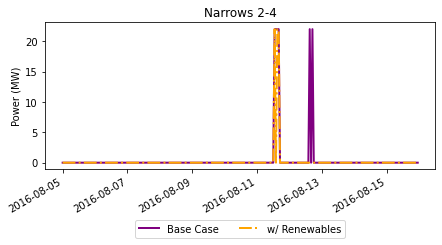

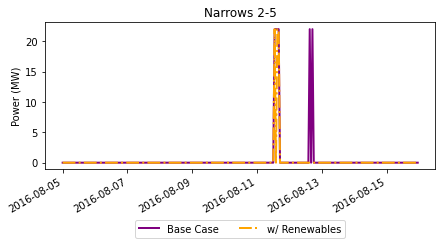

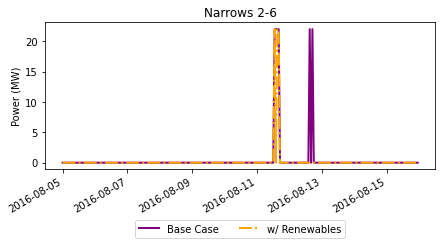

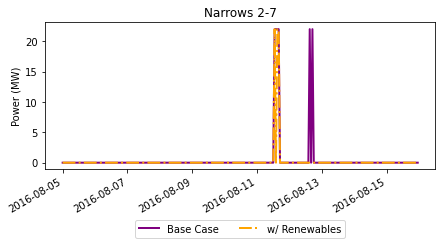

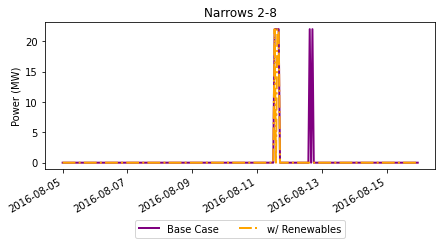

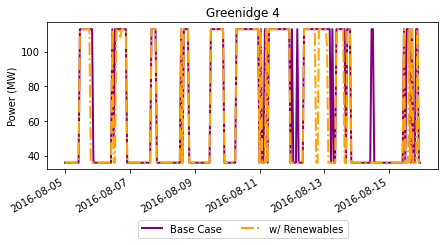

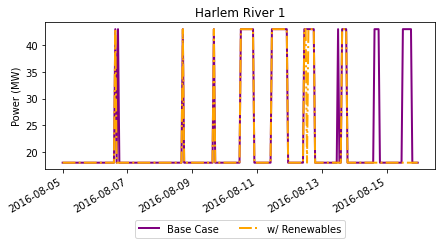

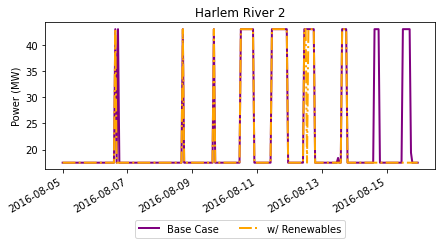

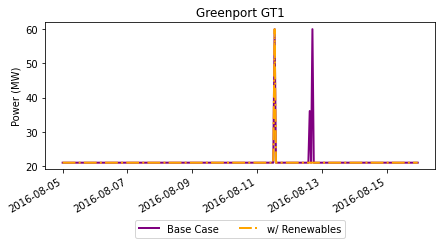

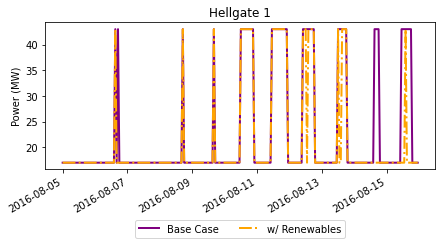

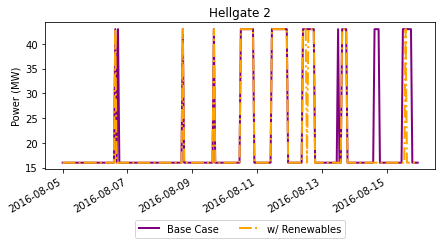

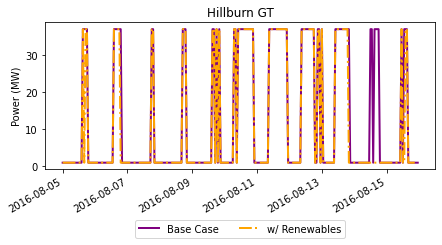

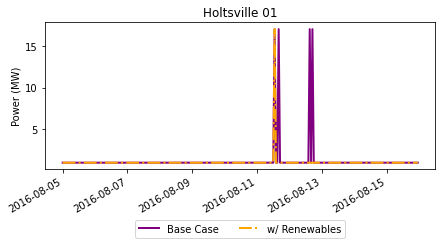

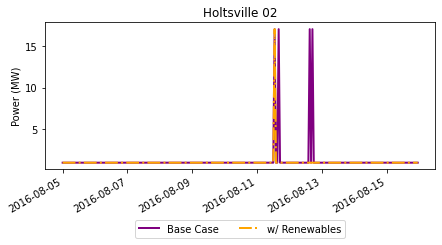

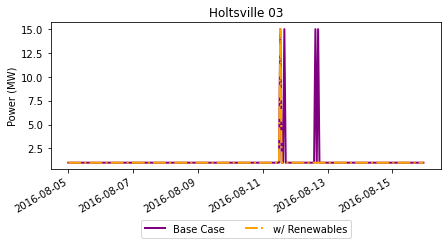

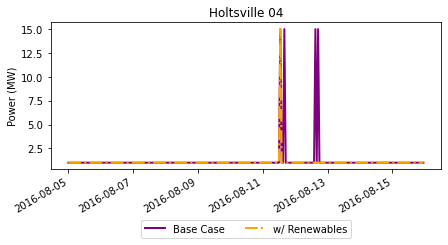

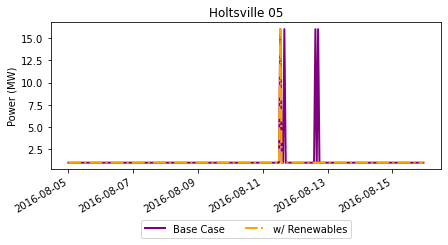

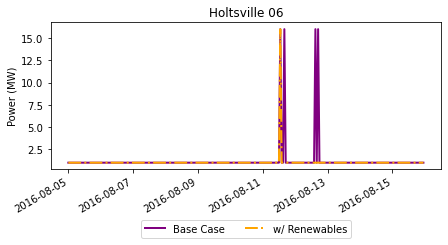

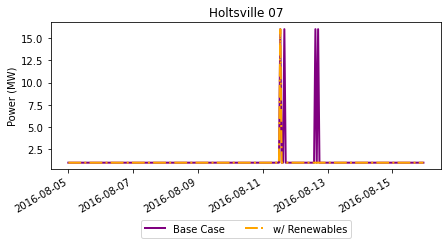

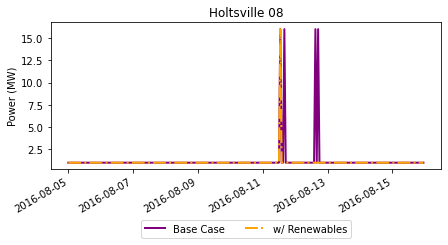

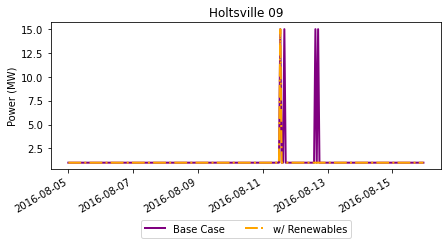

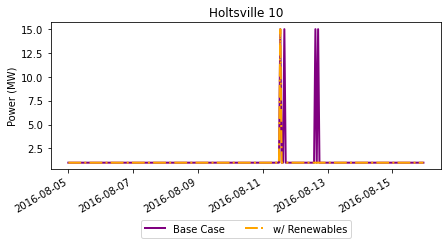

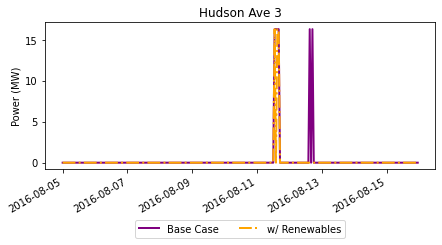

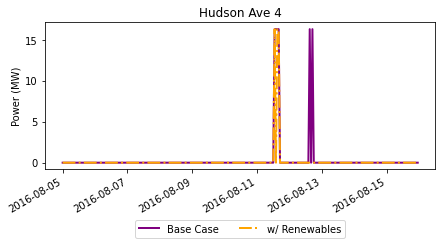

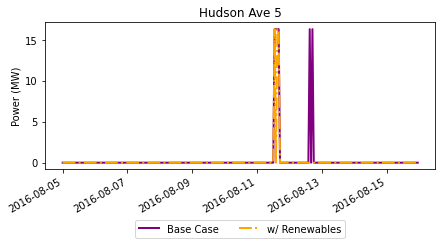

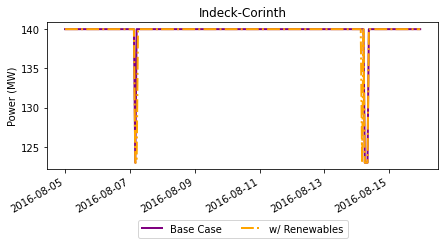

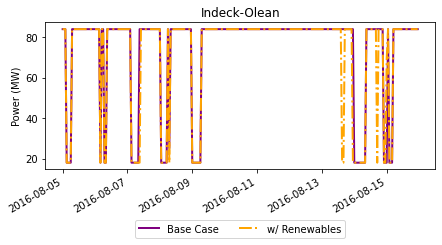

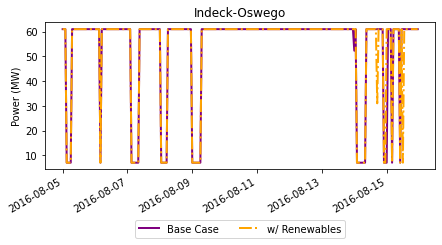

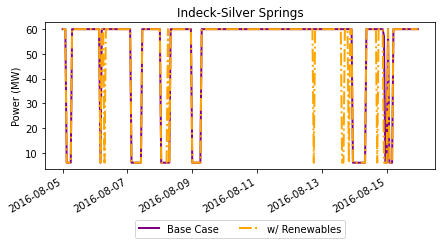

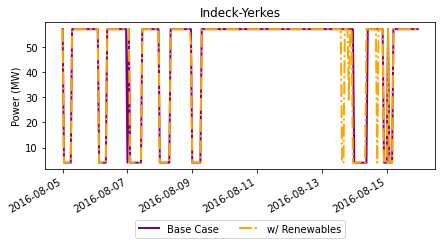

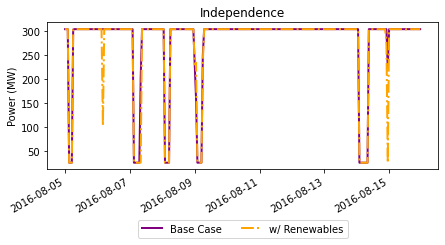

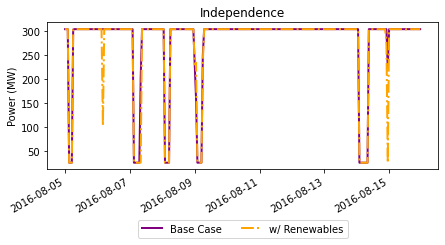

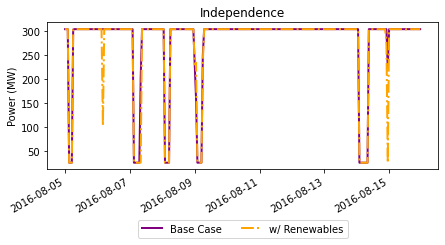

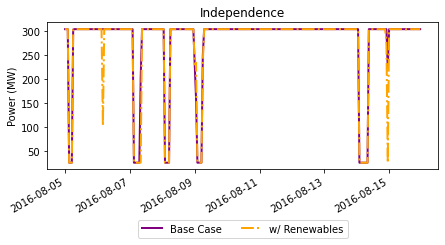

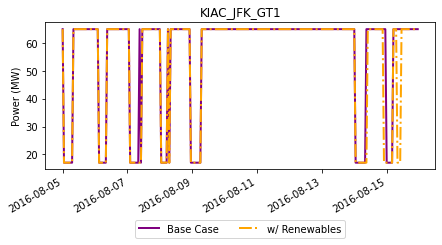

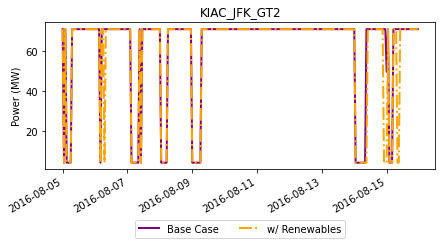

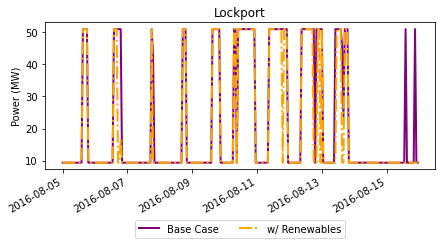

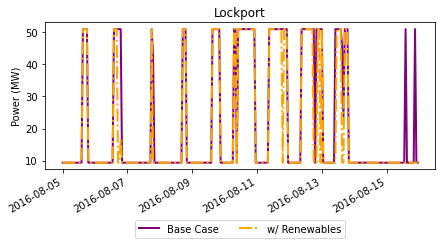

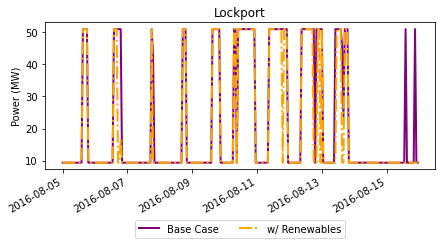

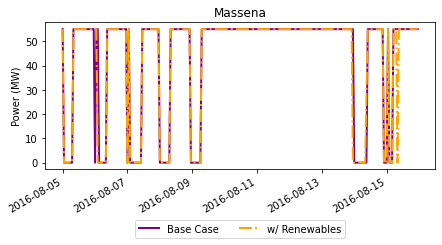

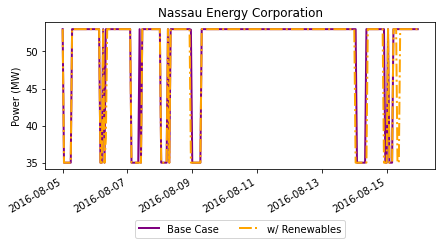

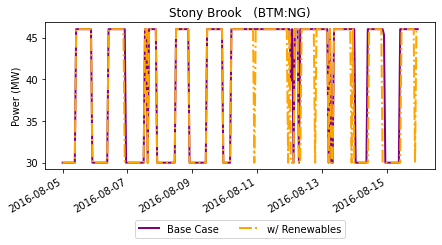

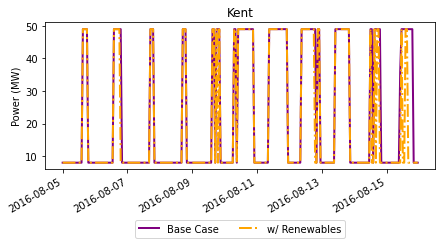

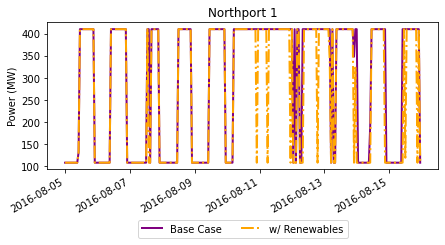

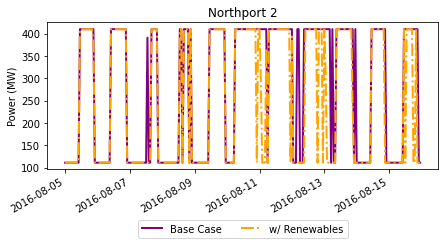

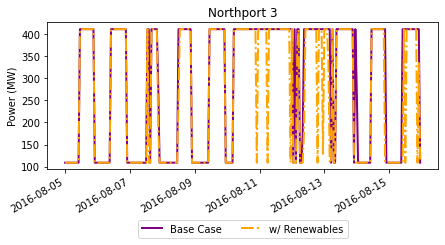

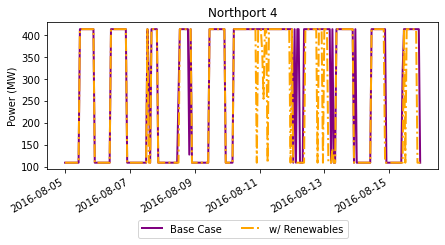

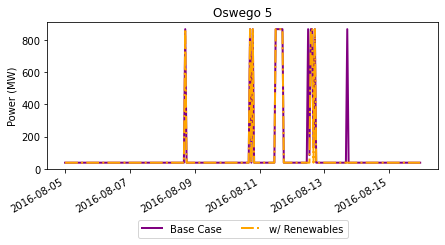

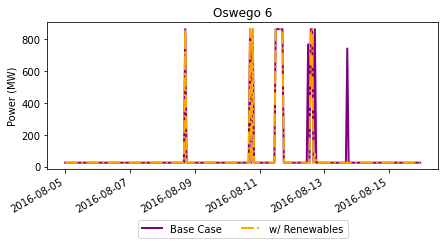

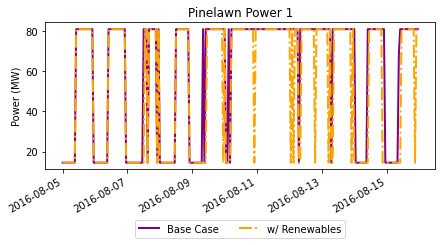

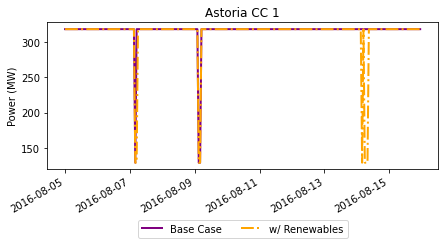

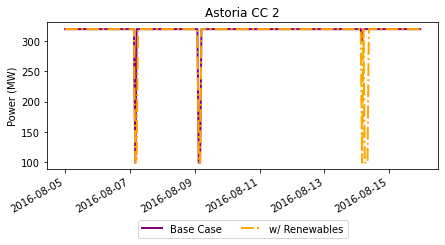

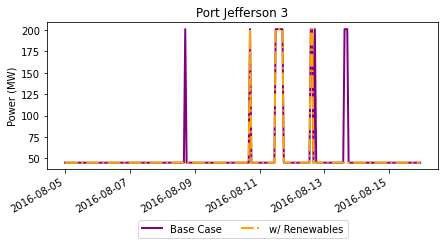

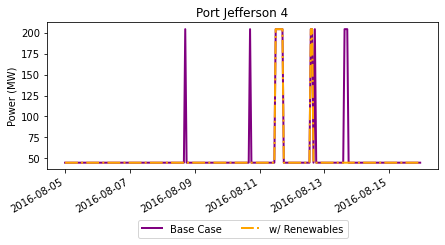

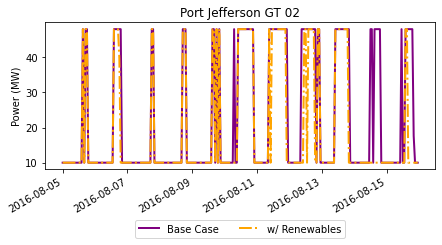

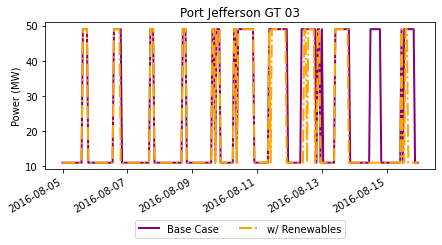

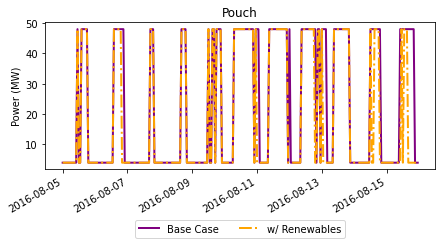

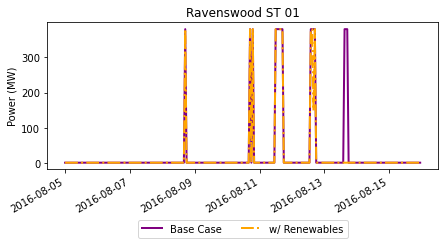

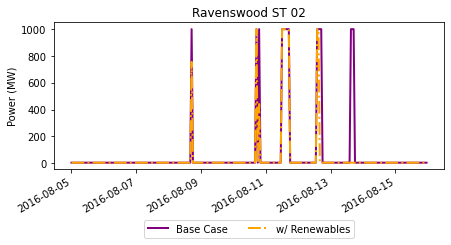

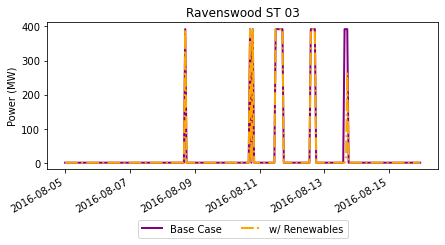

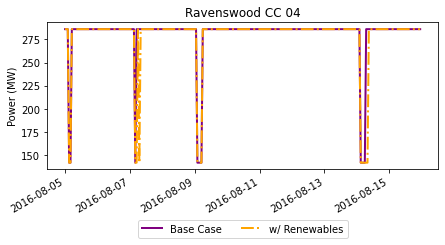

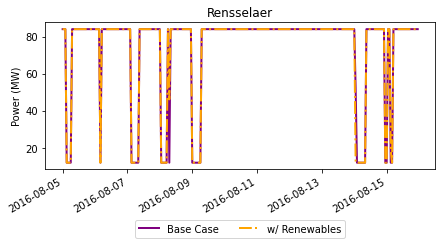

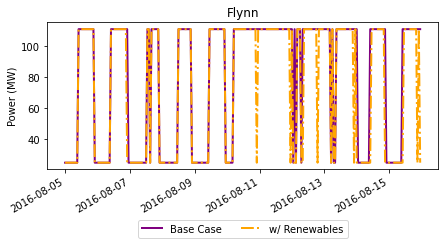

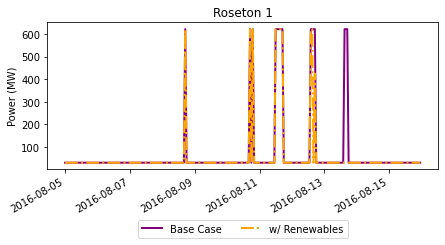

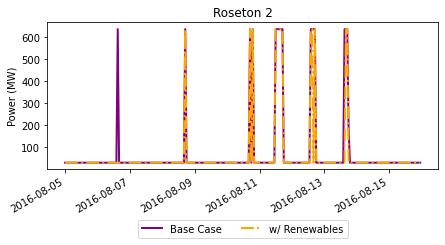

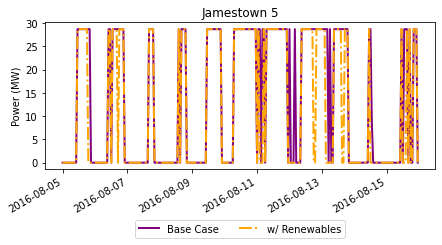

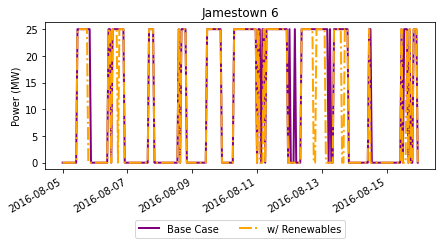

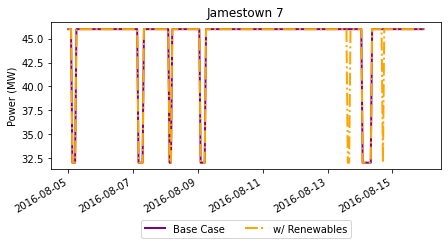

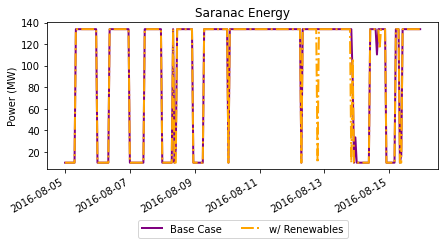

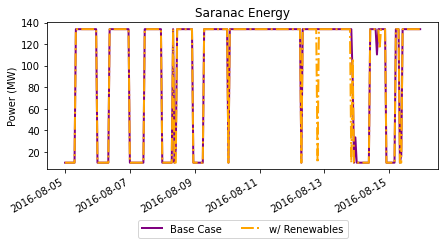

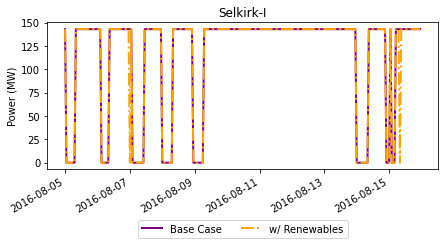

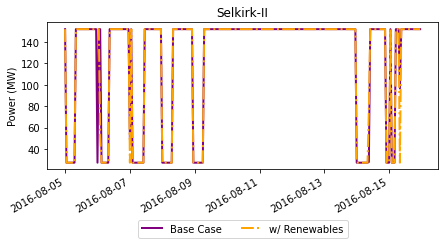

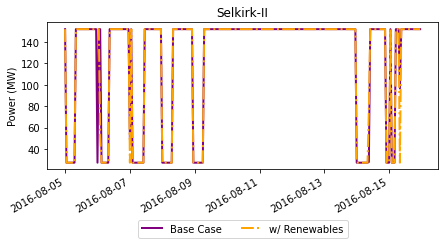

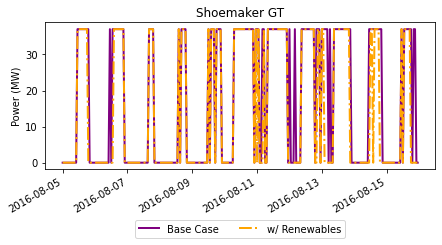

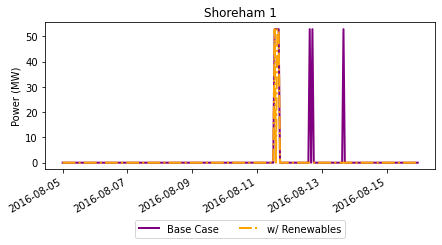

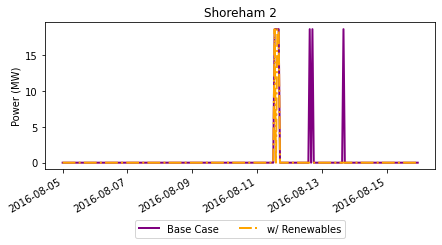

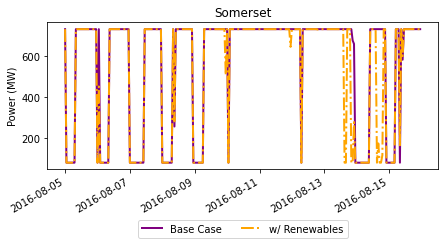

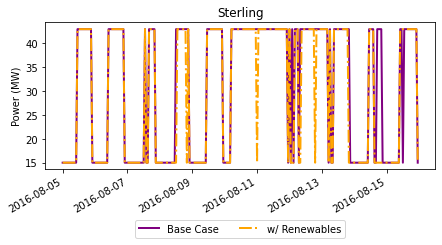

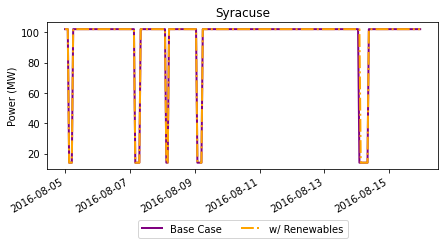

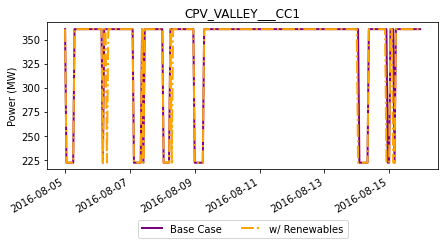

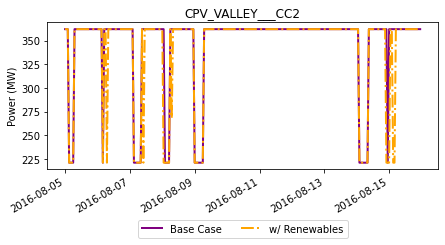

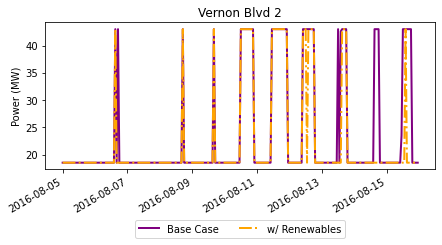

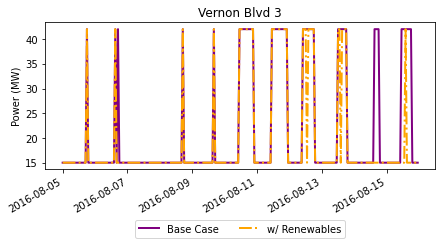

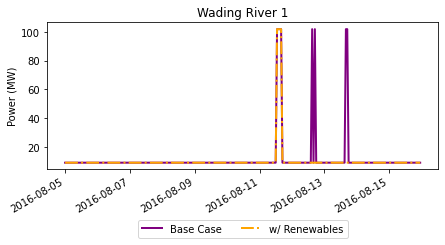

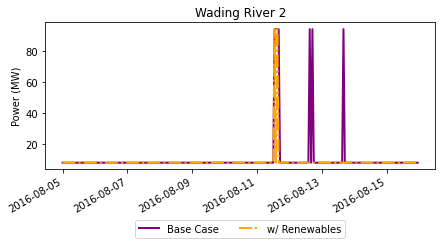

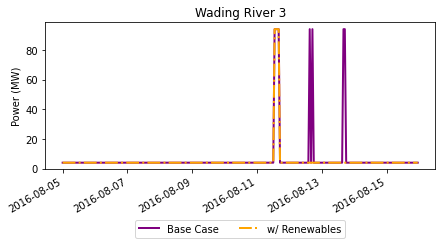

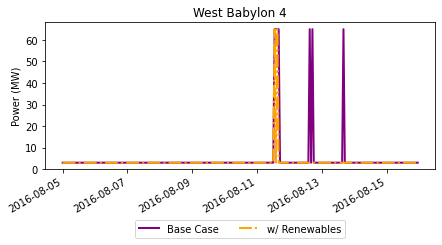

In [109]:
for gen_idx in ed_gen.index:
    dis_change = pd.concat([ed_gen_base.iloc[gen_idx,5:], ed_gen.iloc[gen_idx,5:]], axis=1)
    dis_change.columns = ['Base Case', 'w/ Renewables']
    f = plt.figure(figsize=(7,3))
    p = dis_change.plot(color=['purple','orange'], linewidth=2, style=['-','-.'], ax=f.gca())
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=2)
    plt.title(f'{ed_gen["NYISO Name"][gen_idx]}')
    plt.ylabel('Power (MW)')
    plt.show()